In [14]:
import numpy as np
import nltk
import pandas as pd

## Lexicon based methods

Load in VADER

In [15]:
# nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
vds = SentimentIntensityAnalyzer()

In [16]:
test = "hello i am a test string"
vds.polarity_scores(test)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Load in TextBlob

In [17]:
from textblob import TextBlob

In [18]:
wiki = TextBlob(test)
wiki.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

Load in AFINN

In [19]:
from afinn import Afinn
afn = Afinn()

In [20]:
afn.score(test)

0.0

## Datasets

Load in EmoBank and AffectiveText.

In [72]:
# EmoBank
eb = pd.read_csv('../../data/clean/emobank.csv')
print("EmoBank:")
print(eb.head())
# check for repeated rows
print("Repeated rows:")
print(eb[eb.duplicated()])

# AffectiveText trial
at = pd.read_xml('../../data/raw/AffectiveText/AffectiveText.trial/affectivetext_trial.xml')
columns = ['id', 'anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise']
at_em = pd.read_csv('../../data/raw/AffectiveText/AffectiveText.trial/affectivetext_trial_emotions.csv'\
                    ,names=columns, sep=' ')
# add emotion labels to at
for emotion in columns[1:]:
    at[emotion] = at_em[emotion]

# AffectiveText test
at_test = pd.read_xml('../../data/raw/AffectiveText/AffectiveText.test/affectivetext_test.xml')
at_test_em = pd.read_csv('../../data/raw/AffectiveText/AffectiveText.test/affectivetext_test_emotions.csv'\
                    , names=columns, sep=' ')
# add emotion labels to at_test
for emotion in columns[1:]:
    at_test[emotion] = at_test_em[emotion]
# combine at and at_test
at = pd.concat([at, at_test], ignore_index=True)
print("AffectiveText:")
print(at.head())
# check for repeated rows
print("Repeated rows:")
print(at[at.duplicated()])
# save to csv
at.to_csv('../../data/clean/AffectiveText.csv', index=False)

EmoBank:
                    id  split     V     A     D  \
0  110CYL068_1036_1079  train  3.00  3.00  3.20   
1  110CYL068_1079_1110   test  2.80  3.10  2.80   
2  110CYL068_1127_1130  train  3.00  3.00  3.00   
3  110CYL068_1137_1188  train  3.44  3.00  3.22   
4  110CYL068_1189_1328  train  3.55  3.27  3.46   

                                                text  
0        Remember what she said in my last letter? "  
1                          If I wasn't working here.  
2                                                .."  
3  Goodwill helps people get off of public assist...  
4  Sherry learned through our Future Works class ...  
Repeated rows:
Empty DataFrame
Columns: [id, split, V, A, D, text]
Index: []
AffectiveText:
   id                                   instance  anger  disgust  fear  joy  \
0   1     Mortar assault leaves at least 18 dead     22        2    60    0   
1   2                     Goal delight for Sheva      0        0     0   93   
2   3       Nigeria hosta

Identify and merge the overlap between the two datasets.

In [84]:
# clean up EmoBank ids to match AffectiveText
eb['id'] = eb['id'].str.replace('SemEval_', '')
at['id'] = at['id'].astype(str)
# merge EmoBank and AffectiveText
eb_at = pd.merge(eb, at, how='inner', left_on='id', right_on='id',validate='one_to_one')
# check for repeated rows
print("Repeated rows:",len(eb_at[eb_at['instance'].duplicated()]))
print(eb_at.head())
eb_at.to_csv('../../data/clean/EmoBank_AffectiveText.csv', index=False)
# check for any non-matching examples
assert len(eb_at[eb_at['text'] == eb_at['instance']]) == len(eb_at)-1\
    , "There are non-matching examples"

Repeated rows: 21
     id  split     V     A     D  \
0     1  train  2.29  3.29  2.86   
1    10  train  3.50  2.88  3.00   
2   100  train  2.88  3.00  3.00   
3  1000  train  2.00  3.62  2.75   
4  1001  train  2.80  3.00  3.00   

                                                text  \
0             Mortar assault leaves at least 18 dead   
1  Alonso would be happy to retire with three titles   
2                Report criticises US press freedoms   
3  Terror officials see Al Qaeda chiefs regaining...   
4  Ivrea journal: In Italian town, a civics lesso...   

                                            instance  anger  disgust  fear  \
0             Mortar assault leaves at least 18 dead     22        2    60   
1  Alonso would be happy to retire with three titles      0        0     0   
2                Report criticises US press freedoms     25       24     6   
3  Terror officials see Al Qaeda chiefs regaining...     13       11    86   
4  Ivrea journal: In Italian town, a c

id       1192
split    1192
V        1192
A        1192
D        1192
text     1192
in_at    1192
dtype: int64

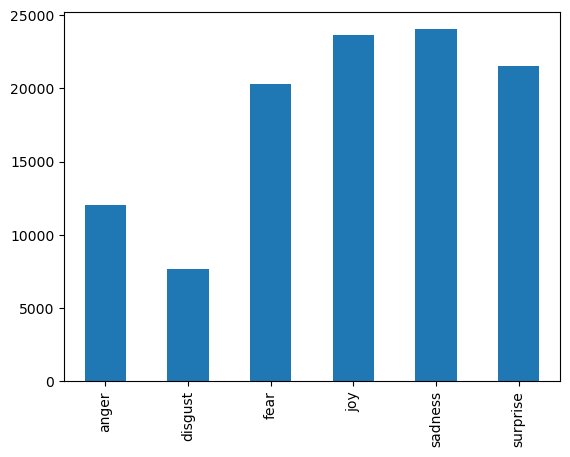

In [25]:
# plot number of instances per emotion
at[columns[1:]].sum().plot(kind='bar')
# count number of instances in eb with "SemEval" in id
eb[eb['id'].str.contains('SemEval')].count()